In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '../')
from utils.topological_colors_extraction import extract_common_colors
from utils.visualization import add_color_bar_to_image

%matplotlib inline

In [2]:
image_path = '../examples/palette.jpg'
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

if img is None:
    print('Can\'t load image: {}'.format(image_path))
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [68]:
common_colors, cover_rates = extract_common_colors(img)

'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from ../third_party/palette_embedding/python/../model/variables/variables


In [70]:
common_colors[0]

array([165, 167, 160], dtype=uint8)

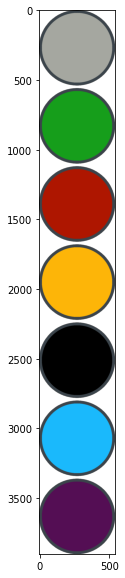

In [77]:
circle_d = 500
shifts = 20
thickness = 20

plot_img = np.zeros(
    (
        (circle_d + thickness * 2) * len(common_colors) + shifts * (len(common_colors) - 1),
        circle_d + thickness * 2, 
        4
    ),
    dtype=np.uint8
)

center_y = circle_d // 2 + thickness
center_x = circle_d // 2 + thickness
for i in range(len(common_colors)):
    plot_img = cv2.circle(
        plot_img,
        (center_x, center_y),
        circle_d // 2 + thickness // 2,
        (59, 68, 75, 255),
        thickness
    )
    
    plot_img = cv2.circle(
        plot_img,
        (center_x, center_y),
        circle_d // 2,
        tuple(common_colors[i].tolist()) + (255,),
        -1,
    )
    
    center_y += circle_d + thickness * 2 + shifts
    

cv2.imwrite('../data/palette_colors.png', cv2.cvtColor(plot_img, cv2.COLOR_RGBA2BGRA))
plt.figure(figsize=(16, 10))
plt.imshow(plot_img)
plt.show()